# Render Episode
Render a stored episode.  Env file needs to have "episode" and "action" keys. 
- creates a moving gif file of the episode
- displays the episode in a widget with a slider for the time steps.

# Setup

In [1]:
#!apt -qq install graphviz libgraphviz-dev pkg-config
#!pip install -qq git+https://gitlab.aicrowd.com/flatland/flatland.git

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import PIL
from flatland.utils.rendertools import RenderTool
import imageio
import os

In [5]:
from IPython.display import clear_output
from IPython.core import display 
display.display(display.HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
def render_env(env_renderer):
    ag0= env_renderer.env.agents[0]
    #print("render_env ag0: ",ag0.position, ag0.direction)
    aImage = env_renderer.render_env(show_rowcols=True, return_image=True)
    pil_image = PIL.Image.fromarray(aImage)
    return pil_image

# Experiments

This has been mostly changed to load envs using `importlib_resources`.  It's getting them from the package "envdata.tests`

In [7]:
# ENV FILE PATH
#env_file = "Test_20_Level_0.pkl"
#env_file = "../../evaluation_visualization/round2/or-0827/Test_23/Level_1.pkl"
#env_file = "../../evaluation_visualization/round2/rl-0827/Test_23/Level_1.pkl"

In [8]:
#if os.path.exists("../env_data"):
#    env_file = "../env_data/tests/Test_2_Level_0.pkl"
#else:
#    env_file = "./env_data/tests/Test_2_Level_0.pkl"

In [9]:
#sPack, sResource = "env_data.tests", "Test_2_Level_0.pkl"
sPack, sResource = "env_data.tests", "Test_9_Level_1.pkl"

In [10]:
#env_file = "../../evaluation_visualization/round2/or-0827/Test_23/Level_1.pkl"
#env_file = "../../evaluation_visualization/round2/rl-0827/Test_23/Level_1.pkl"
filename = "./../env_data/tests/Test_2_Level_0.pkl"

In [11]:
import pickle

from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.malfunction_generators import malfunction_from_file, no_malfunction_generator
from flatland.envs.rail_generators import rail_from_file
from flatland.envs.rail_env import RailEnvActions
from flatland.envs.step_utils.states import TrainState

In [12]:
from flatland.envs.persistence import RailEnvPersister

362


c:\users\u216993\.conda\envs\flatland3-rl\lib\site-packages\flatland\utils\rendertools.py:399: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


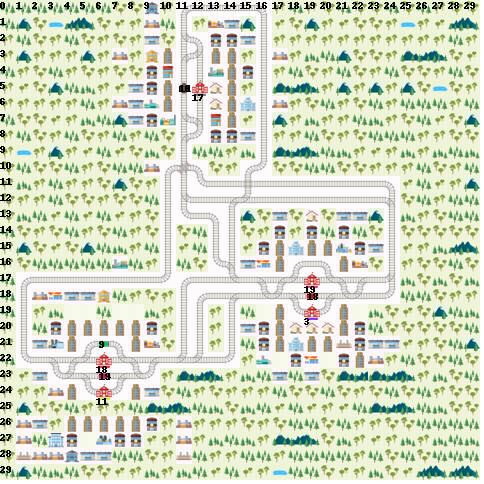

In [13]:
env, env_dict = RailEnvPersister.load_new(filename)#sResource, load_from_package=sPack) # env_file)

# the seed has to match that used to record the episode, in order for the malfunctions to match.
env.reset(random_seed=1001)
oRT = RenderTool(env, show_debug=True)
aImg = oRT.render_env(show_rowcols=True, return_image=True, show_inactive_agents=True)
print(env._max_episode_steps)
PIL.Image.fromarray(aImg)


In [14]:
loAgs = env_dict["agents"]
lCols =  "initial_direction,direction,initial_position,position".split(",")
pd.DataFrame([ [getattr(oAg, sCol) for sCol in lCols] 
              for oAg in loAgs], columns=lCols)

,initial_direction,direction,initial_position,position
0,3,3,"(18, 19)",None
1,3,3,"(23, 6)",None
2,1,1,"(18, 19)",None
3,0,0,"(5, 11)",None
4,2,2,"(5, 11)",None
5,3,3,"(21, 6)",None
6,0,0,"(5, 11)",None
7,3,3,"(21, 6)",None
8,0,0,"(5, 11)",None
9,1,1,"(21, 6)",None


In [15]:
pd.DataFrame([ [getattr(oAg, sCol) for sCol in lCols] 
              for oAg in env.agents], columns=lCols)

,initial_direction,direction,initial_position,position
0,3,3,"(18, 19)",None
1,3,3,"(23, 6)",None
2,1,1,"(18, 19)",None
3,0,0,"(5, 11)",None
4,2,2,"(5, 11)",None
5,3,3,"(21, 6)",None
6,0,0,"(5, 11)",None
7,3,3,"(21, 6)",None
8,0,0,"(5, 11)",None
9,1,1,"(21, 6)",None


In [16]:
pd.DataFrame([ vars(oAg) for oAg in env.agents])

,initial_position,initial_direction,direction,target,moving,earliest_departure,latest_arrival,handle,speed_counter,action_saver,state_machine,malfunction_handler,position,arrival_time,old_direction,old_position
0,"(18, 19)",3,3,"(22, 6)",False,95,163,0,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
1,"(23, 6)",3,3,"(19, 19)",False,186,267,1,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
2,"(18, 19)",1,1,"(5, 12)",False,91,198,2,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
3,"(5, 11)",0,0,"(19, 19)",False,102,316,3,speed: 0.25 max_count: 3 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
4,"(5, 11)",2,2,"(22, 6)",False,77,226,4,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
5,"(21, 6)",3,3,"(5, 12)",False,207,305,5,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
6,"(5, 11)",0,0,"(24, 6)",False,159,334,6,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
7,"(21, 6)",3,3,"(5, 12)",False,89,264,7,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
8,"(5, 11)",0,0,"(22, 6)",False,138,308,8,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
9,"(21, 6)",1,1,"(5, 12)",False,82,304,9,speed: 0.33 max_count: 2 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None


In [17]:
# from persistence.py
def get_agent_state(env):
    list_agents_state = []
    for iAg, oAg in enumerate(env.agents):
        # the int cast is to avoid numpy types which may cause problems with msgpack
        # in env v2, agents may have position None, before starting
        if oAg.position is None:
            pos = (0, 0)
        else:
            pos = (int(oAg.position[0]), int(oAg.position[1]))
        # print("pos:", pos, type(pos[0]))
        list_agents_state.append(
            [*pos, int(oAg.direction), oAg.malfunction_handler])
      
    return list_agents_state

In [18]:
pd.DataFrame([ vars(oAg) for oAg in env.agents])

,initial_position,initial_direction,direction,target,moving,earliest_departure,latest_arrival,handle,speed_counter,action_saver,state_machine,malfunction_handler,position,arrival_time,old_direction,old_position
0,"(18, 19)",3,3,"(22, 6)",False,95,163,0,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
1,"(23, 6)",3,3,"(19, 19)",False,186,267,1,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
2,"(18, 19)",1,1,"(5, 12)",False,91,198,2,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
3,"(5, 11)",0,0,"(19, 19)",False,102,316,3,speed: 0.25 max_count: 3 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
4,"(5, 11)",2,2,"(22, 6)",False,77,226,4,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
5,"(21, 6)",3,3,"(5, 12)",False,207,305,5,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
6,"(5, 11)",0,0,"(24, 6)",False,159,334,6,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
7,"(21, 6)",3,3,"(5, 12)",False,89,264,7,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
8,"(5, 11)",0,0,"(22, 6)",False,138,308,8,speed: 0.5 max_count: 1 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
9,"(21, 6)",1,1,"(5, 12)",False,82,304,9,speed: 0.33 max_count: 2 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None


In [19]:
expert_actions = []
action = {}

In [20]:
env_renderer = RenderTool(env, gl="PGL", show_debug=True)

n_agents = env.get_num_agents()
x_dim, y_dim = env.width, env.height
max_steps = env_dict['max_episode_steps']

action_dict = {}
frames = []

# log everything in original state
statuses = []
for a in range(n_agents):
    statuses.append(env.agents[a].state)
pilImg = render_env(env_renderer)
frames.append({
    'image': pilImg,
    'statuses': statuses
    })

step = 0
all_done = False
failed_action_check = False
print("Processing episode steps:")
while not all_done:
    print(step, end=", ")
     
    for agent_handle, agent in enumerate(env.agents):
        action_dict.update({agent_handle: RailEnvActions.MOVE_FORWARD})
     
    next_obs, all_rewards, done, info = env.step(action_dict)
  
    statuses = []
    for a in range(n_agents):
        statuses.append(env.agents[a].state)

    #clear_output(wait=True)
    pilImg = render_env(env_renderer)
    frames.append({
        'image': pilImg,
        'statuses': statuses
      })
    #print("Replaying {}/{}".format(step, max_steps))

    if done['__all__']:
        all_done = True
        max_steps = step + 1
        print("done")

    step += 1

c:\users\u216993\.conda\envs\flatland3-rl\lib\site-packages\flatland\utils\rendertools.py:399: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


Processing episode steps:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [21]:
assert failed_action_check == False, "Realised states did not match stored states."

In [22]:
env._max_episode_steps

362

In [ ]:
sfImg = sResource.replace("pkl", "gif")
imageio.mimsave(sfImg, [d["image"] for d in frames], subrectangles=True)

In [ ]:
sfImg

In [ ]:
display.Image(sfImg)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, Play
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from IPython.display import HTML

display.display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

def plot_func(frame_idx):
    frame = frames[int(frame_idx)]
    display.display(frame['image'])
    #print(frame['statuses'])

if True:
    slider = widgets.FloatSlider(value=0, min=0, max=max_steps, step=1)
    interact(plot_func, frame_idx = slider)

    play = Play(
        max=max_steps,
        value=0,
        step=1,
        interval=250
    )

    widgets.link((play, 'value'), (slider, 'value'))
    widgets.VBox([play])